# Part I - (Prosper Loan Data Exploration)
## by (Melodie Ezeani)

## Introduction
> The data is a Loan dataset from Prosper. It contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
print(loan_data.shape)
print(loan_data.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
loan_data.nunique()

ListingKey                             113066
ListingNumber                          113066
ListingCreationDate                    113064
CreditGrade                                 8
Term                                        3
LoanStatus                                 12
ClosedDate                               2802
BorrowerAPR                              6677
BorrowerRate                             2294
LenderYield                              2283
EstimatedEffectiveYield                  1582
EstimatedLoss                             120
EstimatedReturn                          1476
ProsperRating (numeric)                     7
ProsperRating (Alpha)                       7
ProsperScore                               11
ListingCategory (numeric)                  21
BorrowerState                              51
Occupation                                 67
EmploymentStatus                            8
EmploymentStatusDuration                  605
IsBorrowerHomeowner               

### What is the structure of your dataset?

> There are 113,937 records in the dataset with 81 features. Most variables are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in finding out some features that influence loan status. I'm also interested in features that best predict the loan amount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some features I think would help are: Loan Term, Borrower's rate(interest rate of the loan), employment status of the borrower, CreditScoreRange(Upper & Lower), Current Delinquencies of the borrower, AmountDelinquent , and Income Range of the borrower.

> Other features that may be good to look at include: BorrowerState, Occupation, EmploymentStatusDuration, IsBorrowerHomeowner, TotalCreditLinespast7years, DelinquenciesLast7Years, AvailableBankcardCredit, IncomeVerifiable, TotalProsperLoans
TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding

In [7]:
variables_of_interest = ['Term', 'LoanStatus', 'BorrowerRate', 'EmploymentStatus', 'CreditScoreRangeUpper', 
                         'CreditScoreRangeLower', 'CurrentDelinquencies', 'AmountDelinquent', 'IncomeRange', 'BorrowerState', 
                         'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'TotalCreditLinespast7years',
                         'DelinquenciesLast7Years', 'AvailableBankcardCredit', 'IncomeVerifiable', 'TotalProsperLoans',
                         'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
                         'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
                         'LoanOriginalAmount']

loan_subset = loan_data[variables_of_interest]
loan_subset.head()

,Term,LoanStatus,BorrowerRate,EmploymentStatus,CreditScoreRangeUpper,CreditScoreRangeLower,CurrentDelinquencies,AmountDelinquent,IncomeRange,BorrowerState,Occupation,EmploymentStatusDuration,IsBorrowerHomeowner,TotalCreditLinespast7years,DelinquenciesLast7Years,AvailableBankcardCredit,IncomeVerifiable,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount
0,36,Completed,0.1580,Self-employed,659.0,640.0,2.0,472.0,"$25,000-49,999",CO,Other,2.0,True,12.0,4.0,1500.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9425
1,36,Current,0.0920,Employed,699.0,680.0,0.0,0.0,"$50,000-74,999",CO,Professional,44.0,False,29.0,0.0,10266.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000
2,36,Completed,0.2750,Not available,499.0,480.0,1.0,NaN,Not displayed,GA,Other,NaN,False,3.0,0.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3001
3,36,Current,0.0974,Employed,819.0,800.0,4.0,10056.0,"$25,000-49,999",GA,Skilled Labor,113.0,True,29.0,14.0,30754.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000
4,36,Current,0.2085,Employed,699.0,680.0,0.0,0.0,"$100,000+",MN,Executive,44.0,True,49.0,0.0,695.0,True,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,15000


### Assessing the data

In [8]:
loan_subset.shape

(113937, 25)

In [9]:
# descriptive statistics for numeric variables
loan_subset.describe()

,Term,BorrowerRate,CreditScoreRangeUpper,CreditScoreRangeLower,CurrentDelinquencies,AmountDelinquent,EmploymentStatusDuration,TotalCreditLinespast7years,DelinquenciesLast7Years,AvailableBankcardCredit,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount
count,113937.000000,113937.000000,113346.000000,113346.000000,113240.000000,106315.000000,106312.000000,113240.000000,112947.000000,106393.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,113937.00000
mean,40.830248,0.192764,704.567731,685.567731,0.592052,984.507059,96.071582,26.754539,4.154984,11210.225447,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,8337.01385
std,10.436212,0.074818,66.458275,66.458275,1.978707,7158.270157,94.480605,13.637871,10.160216,19818.361309,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,6245.80058
min,12.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.00000
25%,36.000000,0.134000,679.000000,660.000000,0.000000,0.000000,26.000000,17.000000,0.000000,880.000000,1.000000,9.000000,9.000000,0.000000,0.000000,3500.000000,0.000000,4000.00000
50%,36.000000,0.184000,699.000000,680.000000,0.000000,0.000000,67.000000,25.000000,0.000000,4100.000000,1.000000,16.000000,15.000000,0.000000,0.000000,6000.000000,1626.550000,6500.00000
75%,36.000000,0.250000,739.000000,720.000000,0.000000,0.000000,137.000000,35.000000,3.000000,13180.000000,2.000000,33.000000,32.000000,0.000000,0.000000,11000.000000,4126.720000,12000.00000
max,60.000000,0.497500,899.000000,880.000000,83.000000,463881.000000,755.000000,136.000000,99.000000,646285.000000,8.000000,141.000000,141.000000,42.000000,21.000000,72499.000000,23450.950000,35000.00000


In [10]:
#checking for duplicates
loan_subset.duplicated().sum()

947

In [11]:
#checking for missing values
loan_subset.isnull().sum()/len(loan_subset) * 100

Term                                    0.000000
LoanStatus                              0.000000
BorrowerRate                            0.000000
EmploymentStatus                        1.979164
CreditScoreRangeUpper                   0.518708
CreditScoreRangeLower                   0.518708
CurrentDelinquencies                    0.611742
AmountDelinquent                        6.689662
IncomeRange                             0.000000
BorrowerState                           4.840394
Occupation                              3.149109
EmploymentStatusDuration                6.692295
IsBorrowerHomeowner                     0.000000
TotalCreditLinespast7years              0.611742
DelinquenciesLast7Years                 0.868901
AvailableBankcardCredit                 6.621203
IncomeVerifiable                        0.000000
TotalProsperLoans                      80.616481
TotalProsperPaymentsBilled             80.616481
OnTimeProsperPayments                  80.616481
ProsperPaymentsLessT

In [12]:
loan_subset.isnull().sum()

Term                                       0
LoanStatus                                 0
BorrowerRate                               0
EmploymentStatus                        2255
CreditScoreRangeUpper                    591
CreditScoreRangeLower                    591
CurrentDelinquencies                     697
AmountDelinquent                        7622
IncomeRange                                0
BorrowerState                           5515
Occupation                              3588
EmploymentStatusDuration                7625
IsBorrowerHomeowner                        0
TotalCreditLinespast7years               697
DelinquenciesLast7Years                  990
AvailableBankcardCredit                 7544
IncomeVerifiable                           0
TotalProsperLoans                      91852
TotalProsperPaymentsBilled             91852
OnTimeProsperPayments                  91852
ProsperPaymentsLessThanOneMonthLate    91852
ProsperPaymentsOneMonthPlusLate        91852
ProsperPri

In [13]:
#checking the data types
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Term                                 113937 non-null  int64  
 1   LoanStatus                           113937 non-null  object 
 2   BorrowerRate                         113937 non-null  float64
 3   EmploymentStatus                     111682 non-null  object 
 4   CreditScoreRangeUpper                113346 non-null  float64
 5   CreditScoreRangeLower                113346 non-null  float64
 6   CurrentDelinquencies                 113240 non-null  float64
 7   AmountDelinquent                     106315 non-null  float64
 8   IncomeRange                          113937 non-null  object 
 9   BorrowerState                        108422 non-null  object 
 10  Occupation                           110349 non-null  object 
 11  EmploymentSta

##### Problems Seen:
- Duplicated rows
- Missing values in columns(EmploymentStatus, CreditScoreRangeUpper, CreditScoreRangeLower, CurrentDelinquencies, AmountDelinquent, BorrowerState, Occupation. EmploymentStatusDuration, BorrowerState, Occupation, EmploymentStatusDuration, TotalCreditLinespast7years, DelinquenciesLast7Years, AvailableBankcardCredit, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed , ProsperPrincipalOutstanding)

### Cleaning the data

Things to do:
- Drop duplicated rows
- Drop columns(TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed , ProsperPrincipalOutstanding) due to large amount of missing values.
- Drop missing values in other columns. I'm dropping missing values in the other columns because  I want to avoid adding artifical values as much as I can.

In [14]:
#copy dataset
clean_data = loan_subset.copy()

In [15]:
#1) drop duplicated rows
clean_data = clean_data.drop_duplicates()

In [16]:
clean_data.duplicated().sum()

0

In [17]:
#2) Drop columns(TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, 
#ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed , ProsperPrincipalOutstanding).
clean_data.drop(columns=['TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 
                          'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 
                          'ProsperPrincipalOutstanding'], inplace=True)

In [18]:
clean_data.columns

Index(['Term', 'LoanStatus', 'BorrowerRate', 'EmploymentStatus',
       'CreditScoreRangeUpper', 'CreditScoreRangeLower',
       'CurrentDelinquencies', 'AmountDelinquent', 'IncomeRange',
       'BorrowerState', 'Occupation', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'TotalCreditLinespast7years',
       'DelinquenciesLast7Years', 'AvailableBankcardCredit',
       'IncomeVerifiable', 'LoanOriginalAmount'],
      dtype='object')

In [19]:
#3) Drop missing values in other columns
clean_data.dropna(inplace=True)

In [20]:
clean_data.shape

(102415, 18)

In [21]:
clean_data.head()

,Term,LoanStatus,BorrowerRate,EmploymentStatus,CreditScoreRangeUpper,CreditScoreRangeLower,CurrentDelinquencies,AmountDelinquent,IncomeRange,BorrowerState,Occupation,EmploymentStatusDuration,IsBorrowerHomeowner,TotalCreditLinespast7years,DelinquenciesLast7Years,AvailableBankcardCredit,IncomeVerifiable,LoanOriginalAmount
0,36,Completed,0.1580,Self-employed,659.0,640.0,2.0,472.0,"$25,000-49,999",CO,Other,2.0,True,12.0,4.0,1500.0,True,9425
1,36,Current,0.0920,Employed,699.0,680.0,0.0,0.0,"$50,000-74,999",CO,Professional,44.0,False,29.0,0.0,10266.0,True,10000
3,36,Current,0.0974,Employed,819.0,800.0,4.0,10056.0,"$25,000-49,999",GA,Skilled Labor,113.0,True,29.0,14.0,30754.0,True,10000
4,36,Current,0.2085,Employed,699.0,680.0,0.0,0.0,"$100,000+",MN,Executive,44.0,True,49.0,0.0,695.0,True,15000
5,60,Current,0.1314,Employed,759.0,740.0,0.0,0.0,"$100,000+",NM,Professional,82.0,True,49.0,0.0,86509.0,True,15000


## Univariate Exploration


I'll start by looking at the distribution of the main variables of interest: Loan Amount and Loan Status

**Question:** What interesting insights can be found from the distributions of these columns?

In [22]:
#creating a function for our histogram plot
def histplot(data, x, bins, xlabel, ylabel, title, figsize:list=[8, 5]):
    """
    This function plots a histogram of the data it is given
    Arguments:
        data: Data frame
        x: variable of interest
        bins: specifies the bins to be used 
        xlabel: label to be used on the x axis
        ylabel: label to be used on the y axis
        title: title of the plot
        figsize: tuple/list specifying the size of the figure       
    """
    plt.figure(figsize=figsize)
    plt.hist(data=data, x=x, bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

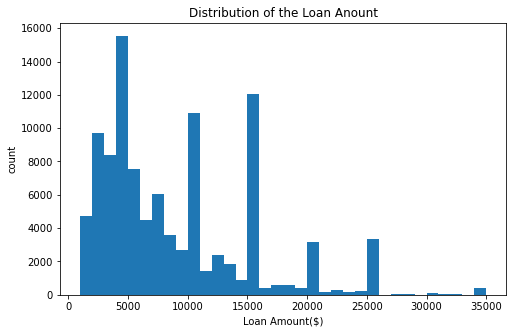

In [23]:
# start with a standard-scaled plot
bins = np.arange(1000, clean_data.LoanOriginalAmount.max()+1000, 1000)

histplot (clean_data, 'LoanOriginalAmount', bins, 'Loan Amount($)', 'count', 'Distribution of the Loan Anount')

There's a long tail in the distribution, with spikes in frequency at different points.`Let's try transforming the data to a log scale.

In [24]:
np.log10(loan_subset.LoanOriginalAmount.describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

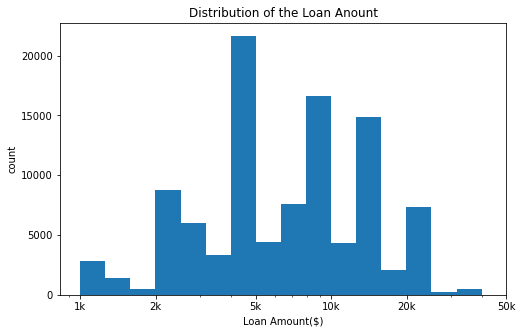

In [25]:
bins = 10 ** np.arange(3.0, np.log10(clean_data.LoanOriginalAmount.max())+0.1, 0.1)

histplot (clean_data, 'LoanOriginalAmount', bins, 'Loan Amount($)', 'count', 'Distribution of the Loan Anount')
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k', '5k', '10k', '20k', '50k']);


The distribution is a bit choppy because the loan amount values are not related to each other, but we can see majority of the values fall between \\$4500 and \\$15000 

Now I'll look at the Loan Status Column

In [26]:
#creating a function for our bar plot
def barchart(data, xlabel, ylabel, title, color, x=None, y=None, figsize:list=[8, 5]):
    """
    This function plots a barchart of the data it is given
    Arguments:
        data: Data frame
        x: variable of interest plotted horizontally
        y: variable of interest plotted vertically
        xlabel: label to be used on the x axis
        ylabel: label to be used on the y axis
        title: title of the plot
        color: color to be applied on the bars 
        figsize: tuple/list specifying the size of the figure
    """
    plt.figure(figsize=figsize)
    sb.countplot(data=data, x=x, y=y, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

In [27]:
#Ordering the Loan Status column
ls_classes = ['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted',  'FinalPaymentInProgress', 'Past Due (1-15 days)',
              'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)',
              'Past Due (>120 days)']
classes = pd.api.types.CategoricalDtype(ordered=True, categories=ls_classes)
clean_data['LoanStatus'] = clean_data['LoanStatus'].astype(classes)

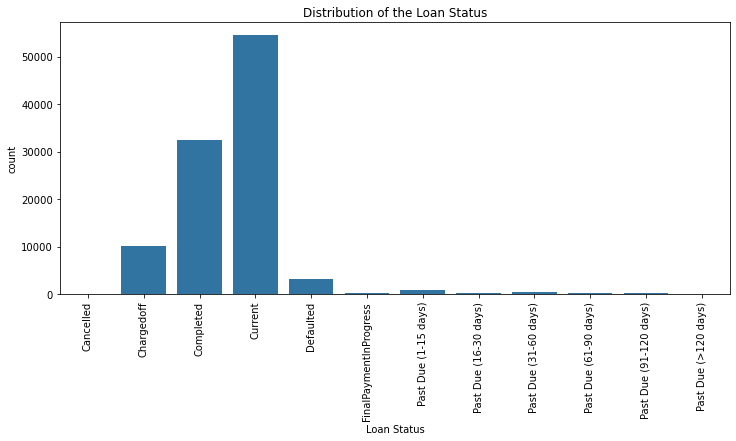

In [28]:
base_color = sb.color_palette()[0]

barchart(clean_data, 'Loan Status', 'count', 'Distribution of the Loan Status', base_color, figsize=[12, 5], x='LoanStatus')
plt.xticks(rotation=90);

The chart shows that most of the loans are still in progress, and a high percentage of borrowers pay off their loans. Charged off loans plus default loans don't even make up to half of the completed loans.

We'll look at some other columns of interest

In [29]:
clean_data.BorrowerRate.describe()

count    102415.000000
mean          0.193616
std           0.075644
min           0.000000
25%           0.134000
50%           0.184000
75%           0.254900
max           0.360000
Name: BorrowerRate, dtype: float64

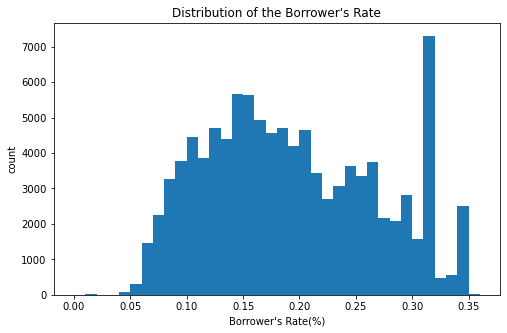

In [30]:
#looking at the distribution of BorrowerRate
bins = np.arange(0, clean_data.BorrowerRate.max()+0.01, 0.01)

histplot (clean_data, 'BorrowerRate', bins, 'Borrower\'s Rate(%)', 'count', 'Distribution of the Borrower\'s Rate')

The distribution of this variable seems to be roughly bimodal with spikes in frequency at 0.32 and 0.35

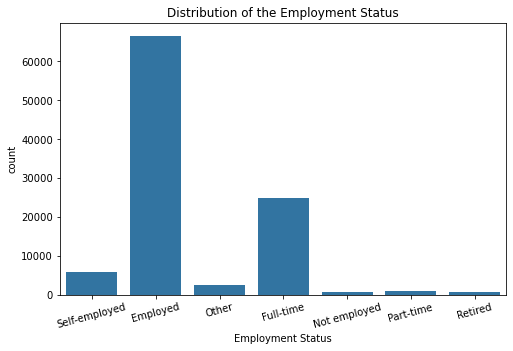

In [31]:
#looking at the distribution of EmploymentStatus
barchart(clean_data,  'Employment Status', 'count', 'Distribution of the Employment Status', base_color, x='EmploymentStatus')
plt.xticks(rotation=15);

Most of the borrowers are employed, the lender must have given priority to employed customers

In [32]:
#Getting top 5 states where borrower's live
subset = clean_data.BorrowerState.value_counts()[0:5].index

bs_subset = clean_data.loc[clean_data.BorrowerState.isin(subset)].copy()

#Ordering the Borrower State column from highest to lowest
bs_classes = ['CA', 'NY', 'FL', 'TX', 'IL']
classes = pd.api.types.CategoricalDtype(ordered=True, categories=bs_classes)
bs_subset['BorrowerState'] = bs_subset['BorrowerState'].astype(classes)

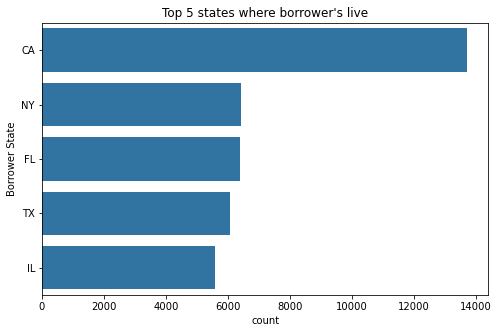

In [33]:
#viewing the top 5 states where borrower's live
barchart(bs_subset,'count', 'Borrower State', 'Top 5 states where borrower\'s live', base_color, y='BorrowerState');

This chart shows that most of the borrowers reside in the state of California

In [34]:
#Ordering the IncomeRange column
ir_classes = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', 
              'Not displayed']
classes = pd.api.types.CategoricalDtype(ordered=True, categories=ir_classes)
clean_data['IncomeRange'] = clean_data['IncomeRange'].astype(classes)

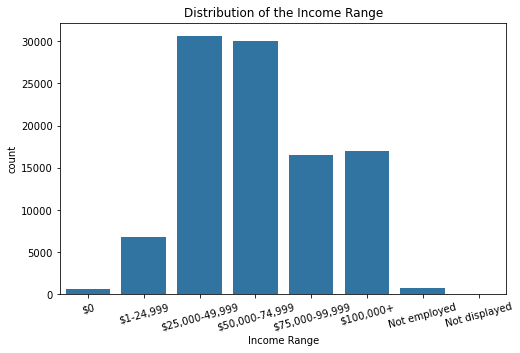

In [35]:
#looking at the distribution of IncomeRange
barchart(clean_data,  'Income Range', 'count', 'Distribution of the Income Range', base_color, x='IncomeRange')
plt.xticks(rotation=15);

Most of the borrower's fall into the income range of \\$25,000 and \\$74,999

In [36]:
clean_data.DelinquenciesLast7Years.describe()

count    102415.000000
mean          3.874686
std           9.737050
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          99.000000
Name: DelinquenciesLast7Years, dtype: float64

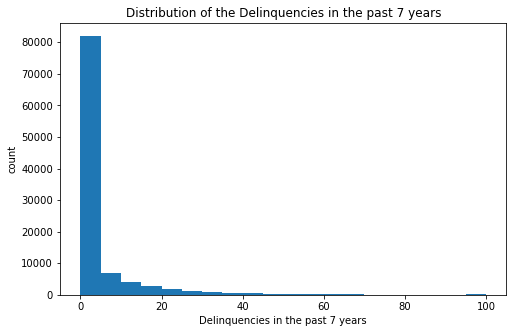

In [37]:
# Viewing the distribution of the DelinquenciesLast7Years column
bins = np.arange(0, clean_data.DelinquenciesLast7Years.max()+5, 5)

histplot (clean_data, 'DelinquenciesLast7Years', bins, 'Delinquencies in the past 7 years', 'count', 
          'Distribution of the Delinquencies in the past 7 years')

The distribution of this column is very much skwed to the right. It is possible the lending company prioritized customers with little to no records of delinquency

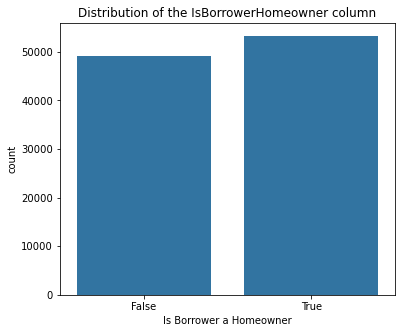

In [38]:
#Distribution of the IsBorrowerHomeowner column
barchart(clean_data,  'Is Borrower a Homeowner', 'count', 'Distribution of the IsBorrowerHomeowner column', base_color, 
         x= 'IsBorrowerHomeowner', figsize=[6, 5]);

We see there is a good number of borrower's who aren't home owners, so most likely this was not a requirement. We'll know better when we use this data for bivariate analysis. 

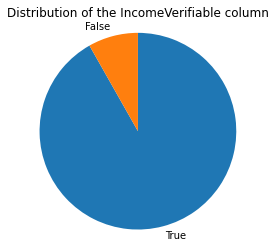

In [39]:
#viewing the distribution of the IncomeVerifiable column
counts = clean_data.IncomeVerifiable.value_counts()

plt.pie(counts, labels=counts.index, startangle=90, counterclock=False)
plt.axis('square')
plt.title('Distribution of the IncomeVerifiable column');

This chart shows that priority was given to borrows whose income could be verified.

In [40]:
#Getting top 5 occupations of the borrowers
subset = clean_data.Occupation.value_counts()[0:5].index

occ_subset = clean_data.loc[clean_data.Occupation.isin(subset)].copy()

#Ordering the Borrower State column from highest to lowest
occ_classes = ['Other', 'Professional', 'Computer Programmer', 'Executive', 'Teacher']
classes = pd.api.types.CategoricalDtype(ordered=True, categories=occ_classes)
occ_subset['Occupation'] = occ_subset['Occupation'].astype(classes)

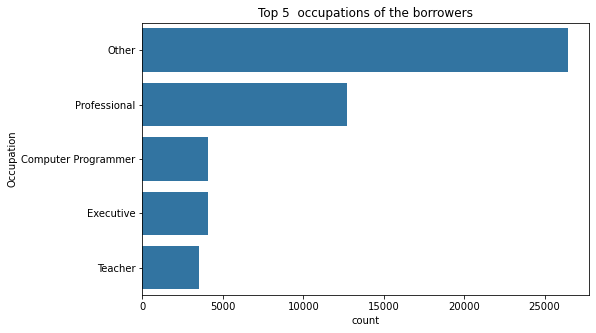

In [41]:
#viewing the top 5 states where borrower's live
barchart(occ_subset,'count', 'Occupation', 'Top 5  occupations of the borrowers', base_color, y='Occupation');

Most of the data filled for occupation wasn't specific it seems. 

In [42]:
clean_data.AvailableBankcardCredit.describe()

count    102415.000000
mean      11277.527247
std       19867.027832
min           0.000000
25%         900.000000
50%        4157.000000
75%       13331.000000
max      646285.000000
Name: AvailableBankcardCredit, dtype: float64

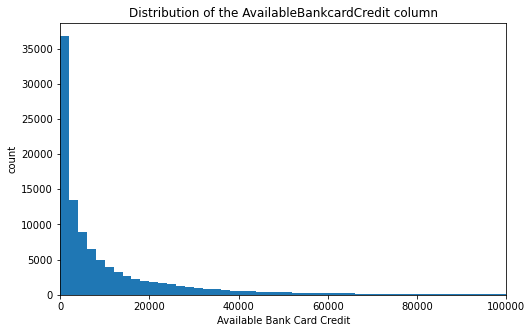

In [43]:
# Viewing the distribution of the AvailableBankcardCredit column
bins = np.arange(0, clean_data.AvailableBankcardCredit.max()+2000, 2000)

histplot (clean_data, 'AvailableBankcardCredit', bins, 'Available Bank Card Credit', 'count', 
          'Distribution of the AvailableBankcardCredit column')
plt.xlim(0, 100000);

The distribution of this column is very skwed to the right. We'll try doing a log transformation on the data.

In [44]:
np.log10(clean_data['AvailableBankcardCredit'].describe())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.010364
mean     4.052214
std      4.298133
min          -inf
25%      2.954243
50%      3.618780
75%      4.124863
max      5.810424
Name: AvailableBankcardCredit, dtype: float64

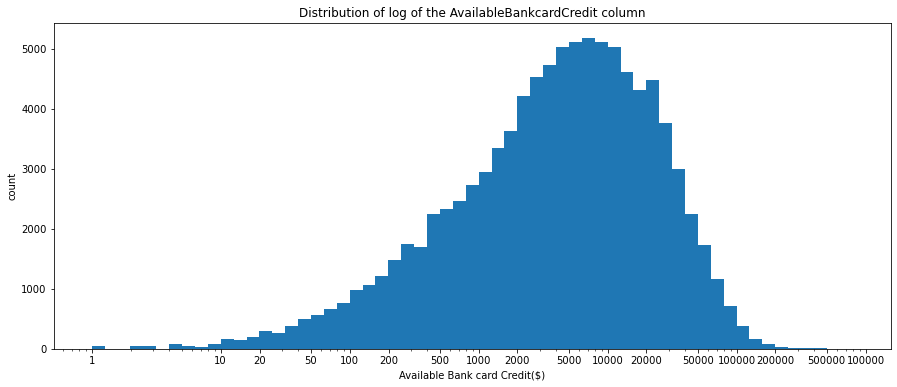

In [45]:
bins = 10 ** np.arange(0, np.log10(clean_data.AvailableBankcardCredit.max())+0.1, 0.1)

histplot (clean_data, 'AvailableBankcardCredit', bins, 'Available Bank card Credit($)', 'count', 
          'Distribution of log of the AvailableBankcardCredit column', figsize=[15, 6])
plt.xscale('log')
plt.xticks([1, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000], 
           ['1', '10', '20', '50',  '100', '200', '500', '1000', '2000', '5000', '10000', '20000', '50000', '100000', 
            '200000', '500000', '100000']);

The tranformation gives more insight on the data. The transformed data follows a slightly normal distribution. The peak of the distribution is between \\$5000 and \\$15000

In [46]:
clean_data.Term.value_counts()

36    76819
60    23982
12     1614
Name: Term, dtype: int64

The term seems to have just 3 categories, so instead of leaving it as a numeric column, we will visualize it as a categorical column

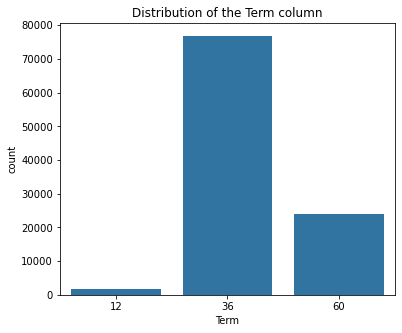

In [47]:
clean_data['Term'] = clean_data.Term.astype('category')

#Viewing the distribution of the Term column
barchart(clean_data,  'Term', 'count', 'Distribution of the Term column', base_color, x='Term', figsize=[6, 5])

We see that most loans have duration of 36 months

In [48]:
clean_data.CreditScoreRangeLower.describe()

count    102415.000000
mean        692.202705
std          55.998805
min         520.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

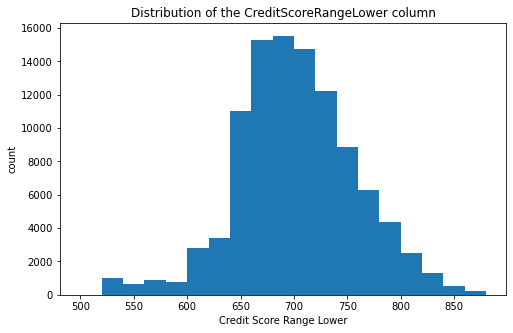

In [49]:
#Viewing the distribution of one of the Credit Score columns

bins = np.arange(500, clean_data.CreditScoreRangeLower.max()+20, 20)

histplot (clean_data, 'CreditScoreRangeLower', bins, 'Credit Score Range Lower', 'count', 
          'Distribution of the CreditScoreRangeLower column')

The distribution of this column is slightly skewed to the left. Most of borrowers have lower credit range between  640 and 720

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the Loan Amount column is skewed to the right. I performed a log transformation, and the distribution became roughly normal.

> My second variable of interest was a categorical variable. For the Loan Status column, the category with the most frequency was 'current', followed by 'completed'. Showing that most of the loans are still in progress, also that most of the loans not in progress have been paid off. The data also shows that there are very few records of loans that have been past due, and that no loan has been cancelled.

> For the other columns:
> - borrower rate - The distribution of this variable seems to be roughly bimodal with spikes in frequency at 0.32 and 0.35
> - empolyment status - Most of the borrowers are employed.
> - borrower state - For this I visualized just the top 5 categories in this column. And ordered the from the highest to the lowest. This chart shows that most of the borrowers reside in the state of California.
> - incomerange - I had to order the categories in this column so that the visualization will make more sense. Most of the borrower's fall into the income range of \\$25,000 and \\$74,999
> - delinquenciesinthepast7yrs - The distribution of this column is very much skewed to the right.
> - isborrowerahomeowner - Looking at the distribution of this column, we see there is a good number of borrower's who aren't home owners, so most likely this was not a requirement.
> - isincomeverifiable - The distribution of this chart shows that most borrowers income could be verified.
> - occupation - For this I also visualized just the top 5 categories in this column. And ordered the from the highest to the lowest. Most of the data filled for occupation wasn't specific it seems.
> - availablebankcredit - The distribution of this column is very skéwed to the right. So I did a log transformation which shows that peak of the distribution is between \\$5000 and \\$15000.
> - Term - the term column, although a numeric column had just three categories, so I changed the dtype to categorical dtype. The distribution showed that most loans had a duration of 36 months
> - CreditScoreRangeLower - This column followed a slightly normal distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The Loan Amount feature had an interesting distribution, and I had to perform a log transformation on the feature. The Loan Status data had an inherent ordering according to the data dictionary, so I made changes so the data can follow its inherent ordering. Also I had to do a log transformation on the Available bank card credit column, to clearly see the distribution of the column. 

> Before plotting visualizations for the features, I had to do a bit of data cleaning. Some features I had  to make a custom data type for, to affect the ordering.

## Bivariate Exploration


To start off with, I want to look at the pairwise correlations present between features in the data.

In [50]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102415 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Term                        102415 non-null  category
 1   LoanStatus                  102415 non-null  category
 2   BorrowerRate                102415 non-null  float64 
 3   EmploymentStatus            102415 non-null  object  
 4   CreditScoreRangeUpper       102415 non-null  float64 
 5   CreditScoreRangeLower       102415 non-null  float64 
 6   CurrentDelinquencies        102415 non-null  float64 
 7   AmountDelinquent            102415 non-null  float64 
 8   IncomeRange                 102415 non-null  category
 9   BorrowerState               102415 non-null  object  
 10  Occupation                  102415 non-null  object  
 11  EmploymentStatusDuration    102415 non-null  float64 
 12  IsBorrowerHomeowner         102415 non-null  bool    
 13 

In [51]:
clean_data.columns

Index(['Term', 'LoanStatus', 'BorrowerRate', 'EmploymentStatus',
       'CreditScoreRangeUpper', 'CreditScoreRangeLower',
       'CurrentDelinquencies', 'AmountDelinquent', 'IncomeRange',
       'BorrowerState', 'Occupation', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'TotalCreditLinespast7years',
       'DelinquenciesLast7Years', 'AvailableBankcardCredit',
       'IncomeVerifiable', 'LoanOriginalAmount'],
      dtype='object')

In [52]:
numeric_vars = ['BorrowerRate', 'CreditScoreRangeUpper', 'CreditScoreRangeLower', 'CurrentDelinquencies', 
                'AmountDelinquent', 'EmploymentStatusDuration', 'TotalCreditLinespast7years', 'DelinquenciesLast7Years', 
                'AvailableBankcardCredit', 'LoanOriginalAmount']
categoric_vars = ['Term', 'LoanStatus', 'EmploymentStatus', 'IncomeRange', 'IsBorrowerHomeowner', 'IncomeVerifiable']

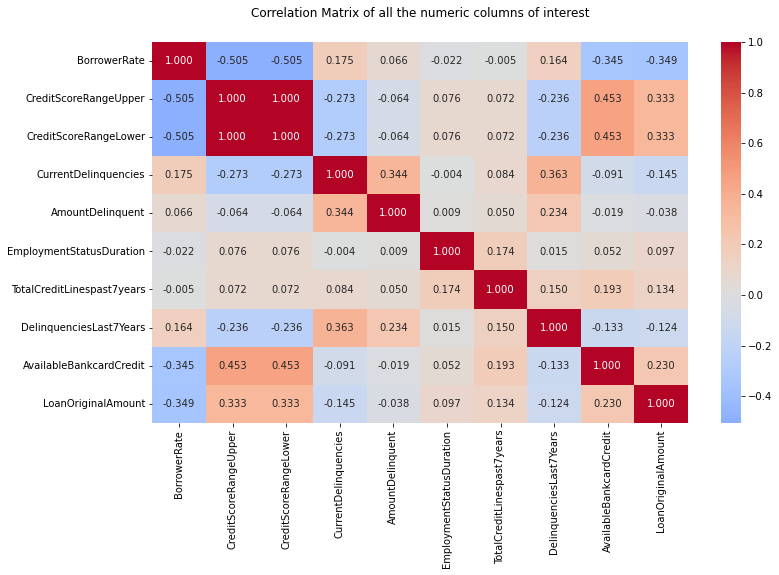

In [53]:
# correlation plot
plt.figure(figsize = [12, 7])
sb.heatmap(clean_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'coolwarm', center = 0)
plt.title('Correlation Matrix of all the numeric columns of interest', y=1.05);

The heatmap shows that CreditScoreRangeLower and CreditScoreRangeUpper have a correlation of 1, so we'll use just CreditScoreRangeLower going forward. 
We'll now plot a plot matrix to investigate the other correlations further

In [54]:
numeric_vars.pop(1) #removing CreditScoreRangeUpper

'CreditScoreRangeUpper'

clean_data.shape= (102415, 18)
data_samp.shape= (2000, 18)


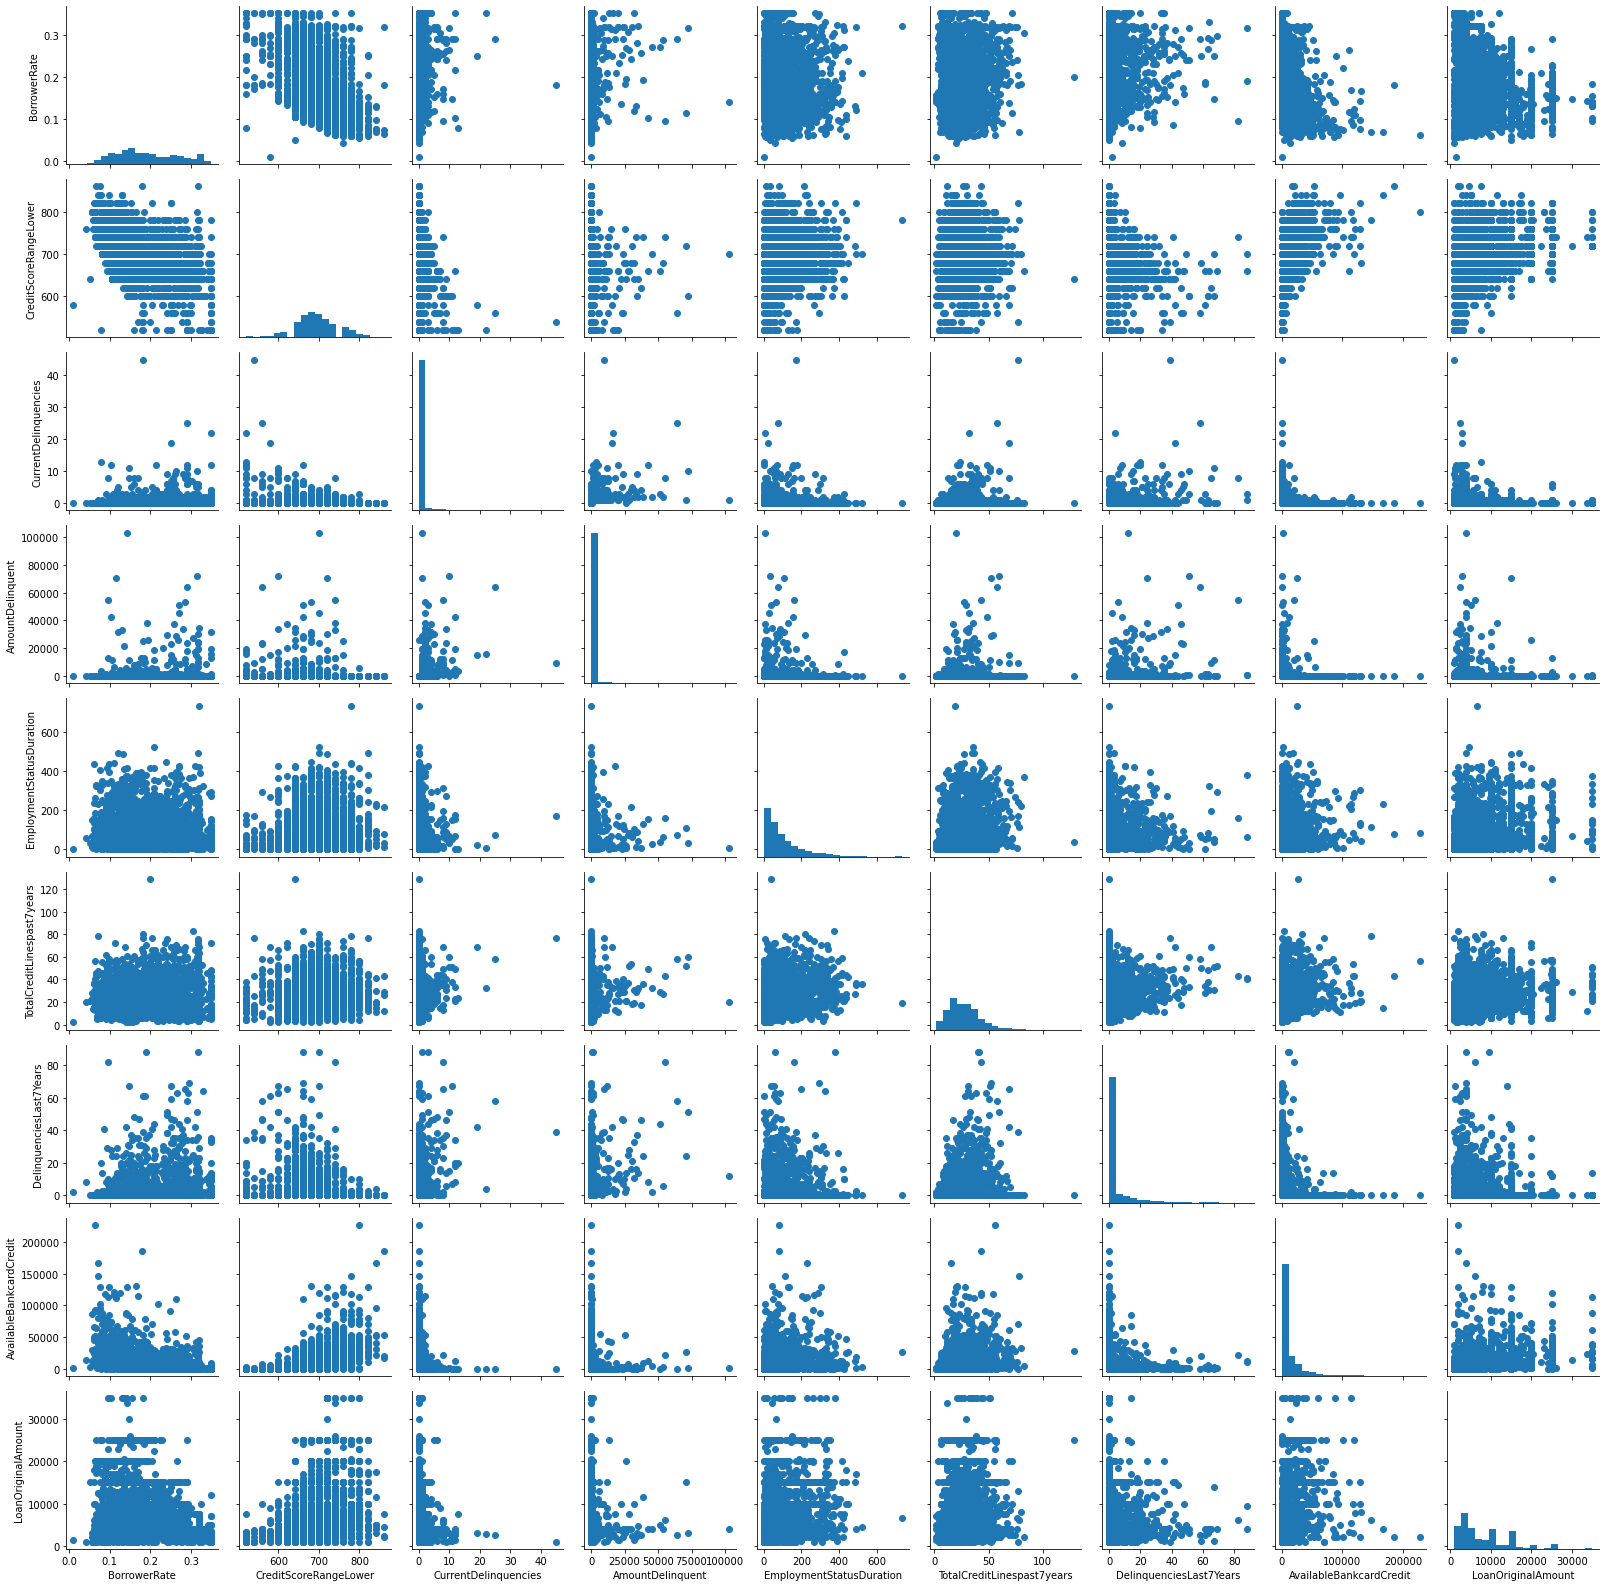

In [55]:
# plot matrix: sample 500 loan records so that plots are clearer and they render faster
print("clean_data.shape=",clean_data.shape)
data_samp = clean_data.sample(n=2000, replace = False)
print("data_samp.shape=",data_samp.shape)

g = sb.PairGrid(data = data_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

##### Insights:
Due to the large amount of numerical variable being looked at, the pairplot is quite clumped together, but the heatmap and pairplot both give some interesting insights.

Loan Original Amount shows an interesting correlation with CreditScoreRangeLower and TotalCreditLinespast7years. It's not suprising to see that the Loan Amount increases with increase in creditscore. It's relationship to TotalCreditLinespast7years is interesting because the heatmap shows the correlation isn't strong. We'll explore this further with other variables.

There's a positive correlation between AvailableBankcardCredit and CreditScoreRangeLower. There also seems to be an interesting relationship between: Delinquencieslat7years and TotalCreditLinespast7years, TotalCreditLinespast7years and EmploymentStatusDuration, Delinquencieslat7years and BorrowerRate, BorrowerRate and CreditScoreRangeLower. These will be worth extra exploration in the next section.

The numerical columns with an interesting relationship with Loan Amount include: CreditScoreRangeLower and TotalCreditLinespast7years. Other numeric columns that will still be good to investigate include: Delinquencieslat7years, EmploymentStatusDuration, AvailableBankcardCredit and BorrowerRate.

Let's move on to looking at how loan status correlate with these numerical variables of interest.

In [56]:
clean_data.LoanStatus.value_counts()

Current                   54480
Completed                 32361
Chargedoff                10225
Defaulted                  3103
Past Due (1-15 days)        793
Past Due (31-60 days)       356
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      201
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64

In [57]:
num_var = ['CreditScoreRangeLower', 'TotalCreditLinespast7years', 'EmploymentStatusDuration', 
           'AvailableBankcardCredit', 'BorrowerRate', 'DelinquenciesLast7Years']

In [58]:
# creating a function for our box grid.
def boxgrid(data, x, y:list, nrows, ncols, figsize=[25, 15]):
    """
    Plots a grid of boxplots showing distribution between a categorical variable and a set of numerical variables.
    No of rows and cols should make up len of the numerical variables list.
    Arguments:
        data: data frame to use
        x: categorical variable
        y: list of numerical variables
        nrows: no of rows to be plotted
        ncols: no of columns to be plotted
        figsize: size of the figure
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.tight_layout(h_pad=5)
    axes = axes.flatten()

    default_color = sb.color_palette()[0]
    index = 0
    r = ncols*nrows
    for i in range(r):
        g = sb.boxplot(data=data, x=x, y=y[index], color=default_color, ax=axes[i])
        g.tick_params(axis='x', labelrotation = 15);
        index += 1

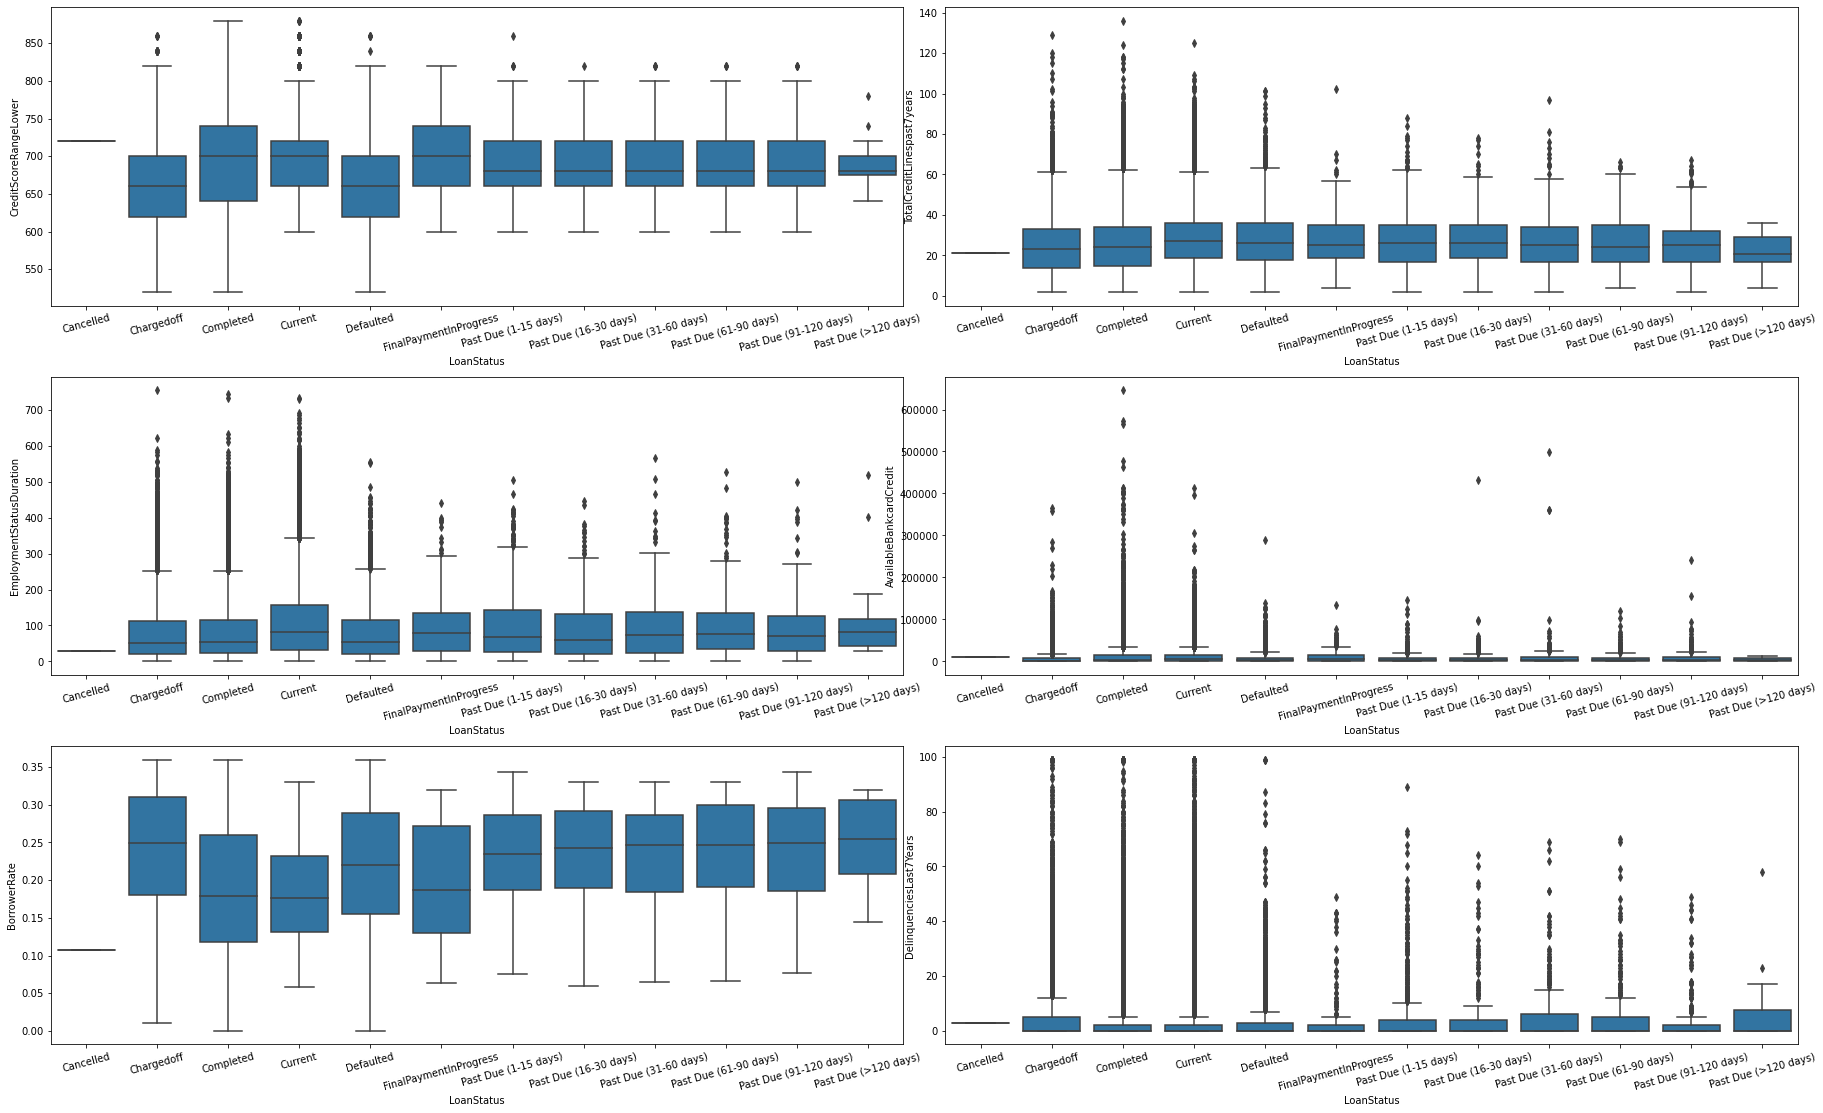

In [59]:
# plot matrix of numeric features against categorical feature - Loan Status.
boxgrid(clean_data, 'LoanStatus', num_var, nrows=3, ncols=2)

The plot above shows some interesting insights:
- Loans that have been completed or currently on-going, have mean credit score lower range of about 700, while loans that have been charged off or defaulted have the lowest credit score lower range.
- The TotalCreditLinespast7years EmploymentStatusDuration, and DelinquenciesLast7years column doesn't seem to have much of a relationship to the Loan status column.
- Loans that have been completed or currently on-going have the lowest borrower rate.

This plot offers a lot of insights but we'll try to remove some outliers in the AvailableBankcardCredit column.

In [60]:
no_outliers = clean_data.copy()

In [61]:
# creating a function that removes outliers
def remove_outliers(data, x):
    """ This removes outliers in a column in a dataframe"""
    Q1 = np.percentile(data[x], 25) 
    Q3 = np.percentile(data[x], 75)
    IQR = Q3 - Q1

    upper = Q3+1.5*IQR  # Upper bound
    lower = Q1-1.5*IQR  # Lower bound

    print("Old Shape: ", data.shape)
    no_outliers = data[(data[x] >= lower) & (data[x] <= upper)]
    print("New Shape: ", no_outliers.shape)
    return no_outliers

In [62]:
### removing outliers in our data from AvailableBankcardCredit
no_outliers = remove_outliers(no_outliers, 'AvailableBankcardCredit')

Old Shape:  (102415, 18)
New Shape:  (92990, 18)


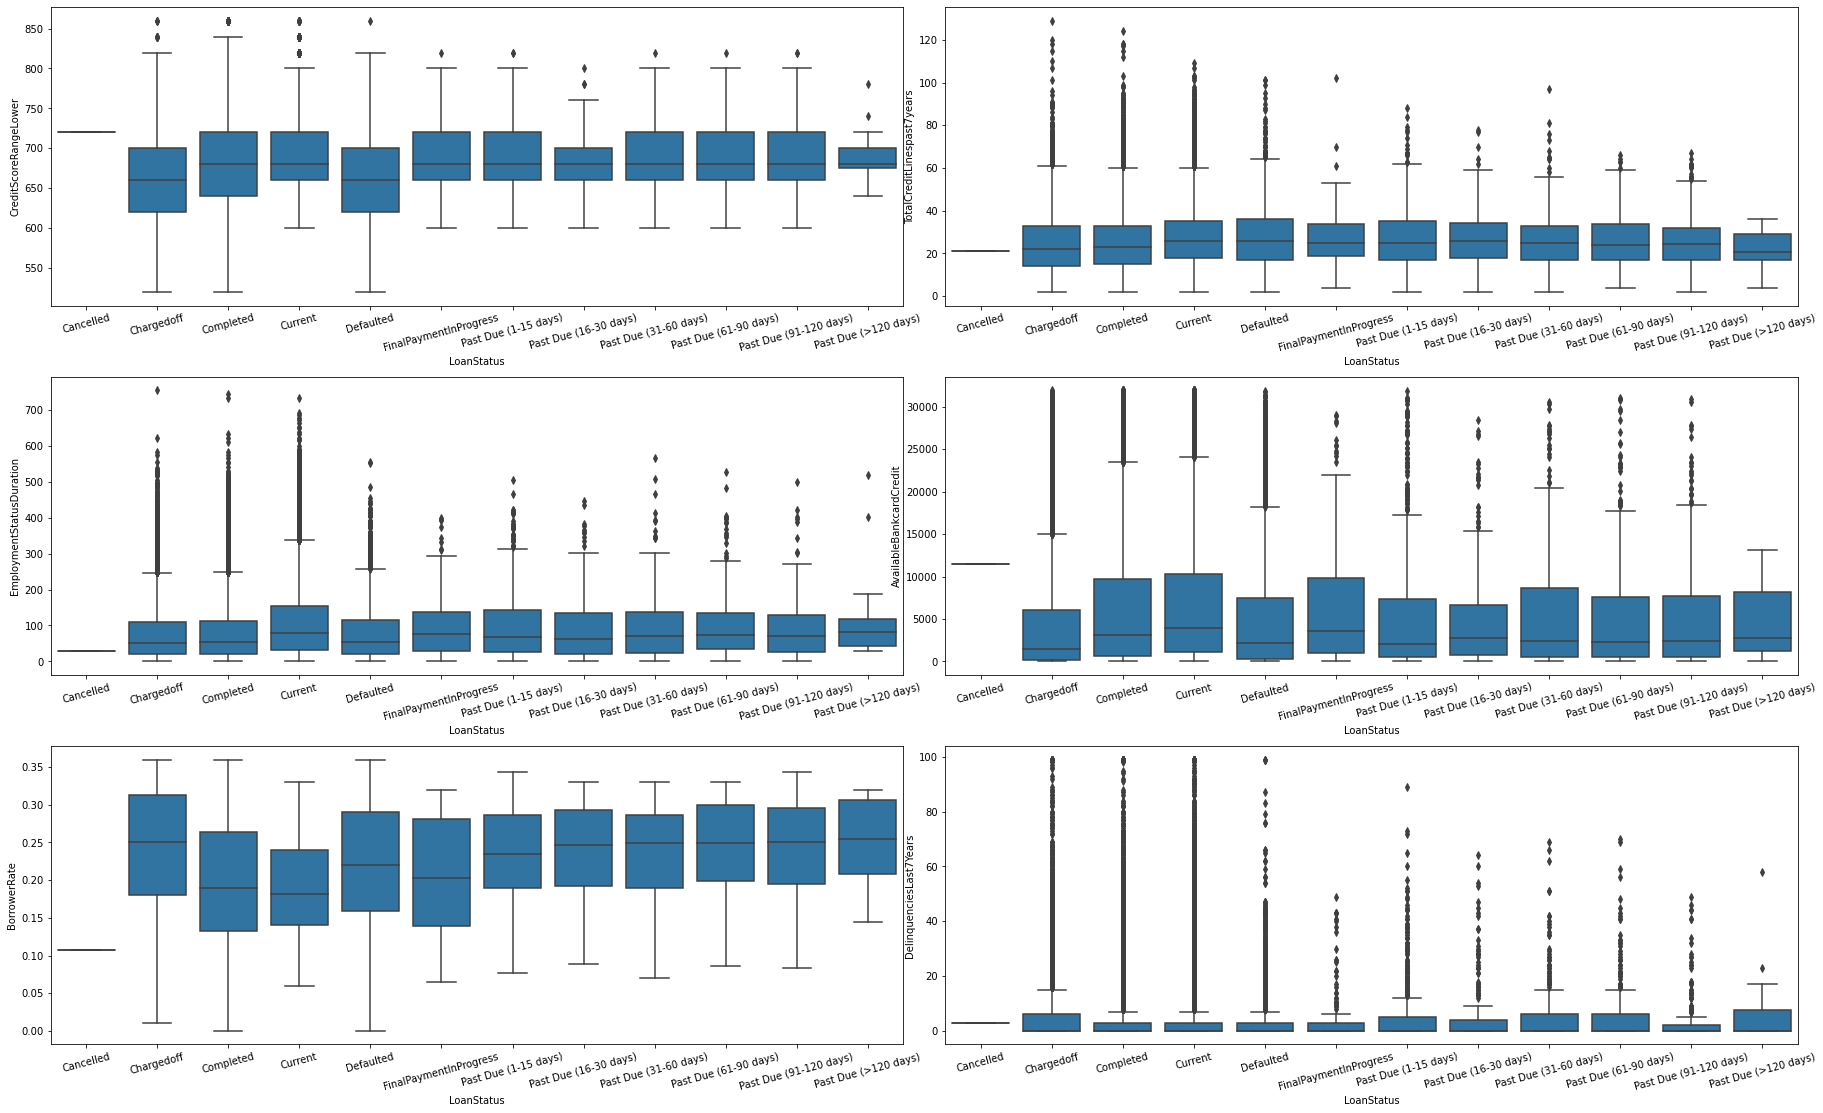

In [63]:
# plot matrix of numeric features against categorical feature - Loan Status, after removing outliers from 
# AvailableBankcardCredit column
boxgrid(no_outliers, 'LoanStatus', num_var, nrows=3, ncols=2)

Here we can see that the Loans with the lowest AvailableBankcardCredit are those that have been charged off and defaulted.

After visualizing my variables of interest against the numerical variables I initially started, the numericals variables I'll be focusing on for the next section would be: CreditScoreRangeLower, AvailableBankcardCredit, BorrowerRate, DelinquenciesLast7Years. I'll focus on these variables because I believe they'll be more useful in answering the questions asked.

Now let's move on to seeing the relationships between the categorical variables and our variables of interest - LoanStatus and LoanOriginalAmount 

In [64]:
categoric_vars

['Term',
 'LoanStatus',
 'EmploymentStatus',
 'IncomeRange',
 'IsBorrowerHomeowner',
 'IncomeVerifiable']

In [65]:
# creating a function for our violin grid.
def violingrid(data, x:list, y, nrows, ncols, figsize=[25, 15]):
    """
    Plots a grid of violinplots showing distribution between a numerical variable and a set of categorical variables.
    No of rows and cols should make up len of the numerical variables list.
    Arguments:
        data: data frame to use
        x: list of categorical variables
        y: numerical variable
        nrows: no of rows to be plotted
        ncols: no of columns to be plotted
        figsize: size of the figure
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.tight_layout(h_pad=5)
    axes = axes.flatten()

    default_color = sb.color_palette()[0]
    index = 0
    r = ncols*nrows
    for i in range(r):
        g = sb.violinplot(data=data, x=x[index], y=y, color=default_color, ax=axes[i])
        g.tick_params(axis='x', labelrotation = 15);
        index += 1

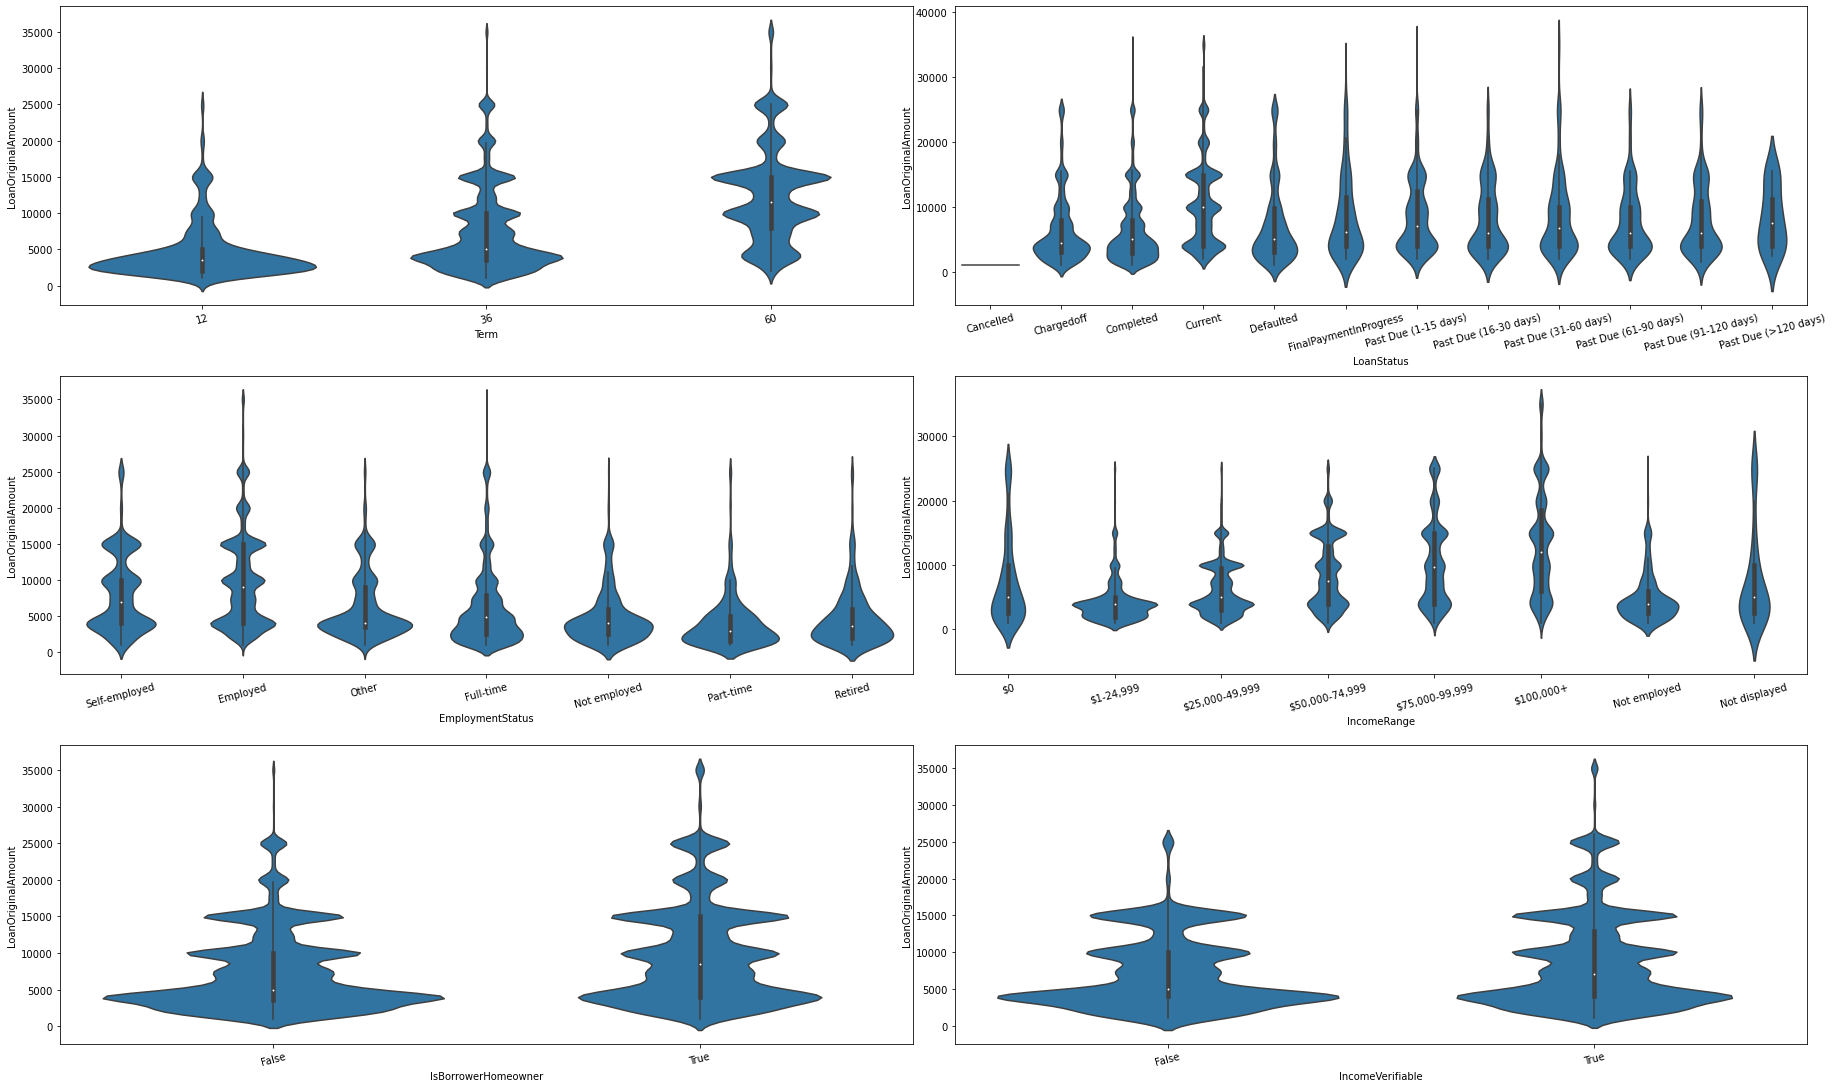

In [66]:
#viewing the relationship between our categorical variables and Loan Amount
violingrid(clean_data, categoric_vars, 'LoanOriginalAmount', nrows=3, ncols=2)

Visulizing the relationship between the categorical columns and Loan Amount show some interesting insights:
   - We see there are a lot customers in the 12 months term, getting loan amount within the range 0-5000. Also, As loan term increases loan amount increases, which isn't really a surpise.
   - There doesn't seem to be much of a relationship between loan status and loan amount, which I find interesting and will investigate more in the next section.
   - More money is given to borrowers who are employed and self employed. However, most of the customers seem to fall into the other categories.
   - As income range increases so does loan amount, this is also expected.
   - We also see that more money is given to customers who are Home owners and whose Incone can be verified.

Let's see if there are any interesting relationships between the categoric and numeric columns

<Figure size 720x720 with 0 Axes>

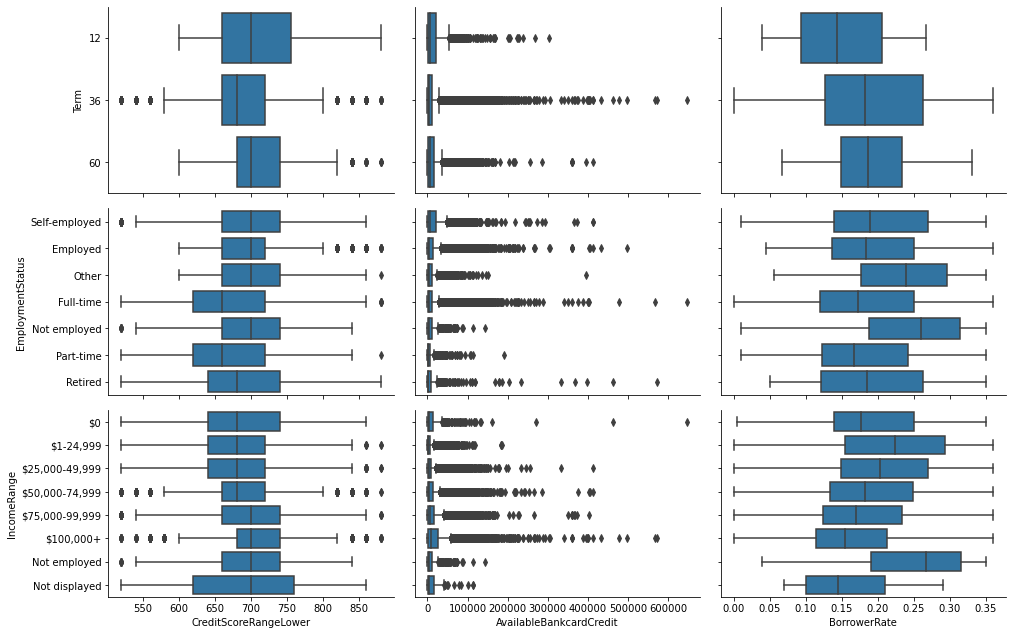

In [67]:
#visualizing the categorical variables against the numerical variables
cat_cols = ['Term', 'EmploymentStatus', 'IncomeRange']
num_cols = [ 'CreditScoreRangeLower', 'AvailableBankcardCredit', 'BorrowerRate']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data=clean_data, y_vars=cat_cols, x_vars=num_cols, height=3, aspect=1.5)
g.map(boxgrid);

<Figure size 720x720 with 0 Axes>

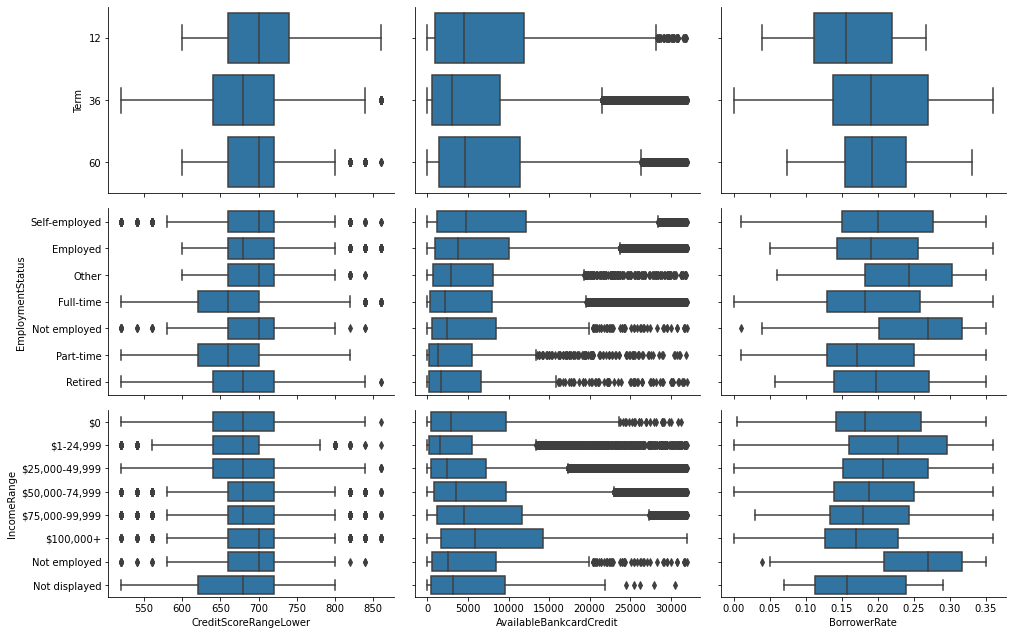

In [68]:
#visualizing using data with no outliers in availablebankcard
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data=no_outliers, y_vars=cat_cols, x_vars=num_cols, height=3, aspect=1.5)
g.map(boxgrid);

##### Insights:
- Credit score range lower tends to increase as Income range increases.
- As Income range increases, the borrower's rate reduces, which is very interesting.
- Available bank card credit tends to increase as income range increases

Now we'll view the relationships between the categorical variables and the Loan Status. We'll filter the categories in the loan status column to just include: 'Chargedoff', 'Completed', 'Current', 'Defaulted', since those are the major categories with significant data points

In [69]:
sample = clean_data.copy()

In [70]:
sample['LoanStatus'] = sample.LoanStatus.astype(str) #changing the dtype 

In [71]:
subset = ['Chargedoff', 'Completed', 'Current', 'Defaulted']

sample = sample[sample['LoanStatus'].isin(subset)].copy()

In [72]:
sample.LoanStatus.value_counts()

Current       54480
Completed     32361
Chargedoff    10225
Defaulted      3103
Name: LoanStatus, dtype: int64

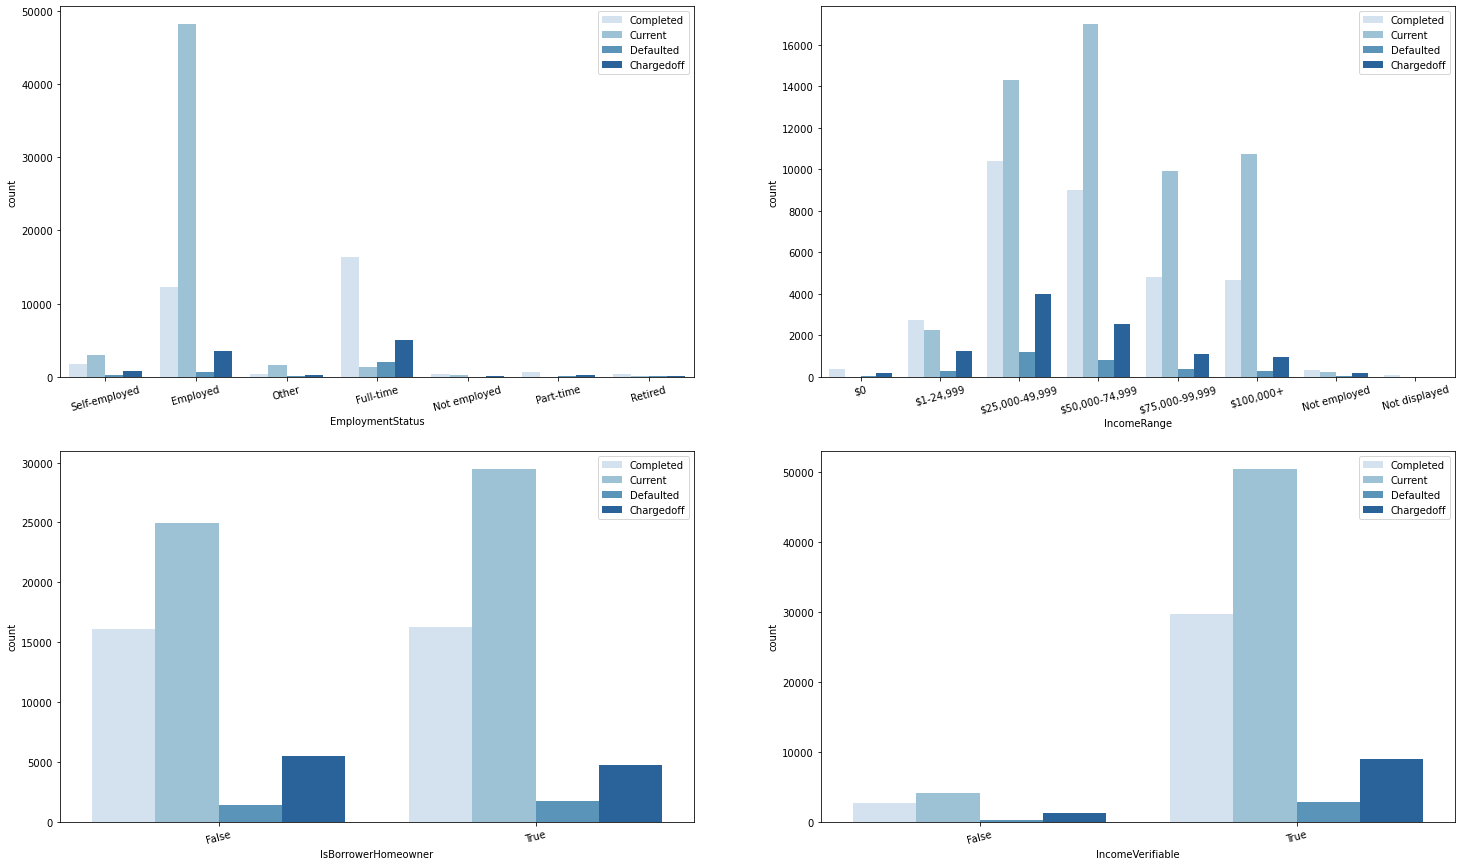

In [73]:
#viewing the relationship between our categorical variables and Loan Status

#categorical variables to plot ar 5, so we'll first view four then plot the last one by itself
cat_cols = ['EmploymentStatus', 'IncomeRange', 'IsBorrowerHomeowner', 'IncomeVerifiable']

fig, axes = plt.subplots(2, 2, figsize=[25, 15])
axes = axes.flatten()
index = 0

for i in range(4):
    g = sb.countplot(data=sample, hue='LoanStatus', x=cat_cols[index], palette = 'Blues', ax=axes[i])
    g.tick_params(axis='x', labelrotation = 15)
    g.legend(loc = 1); # re-arrange legend to remove overlapping
    index += 1

In [74]:
def clusteredbar(data, x, hue, palette, figsize=(8,6)):
    """Plots a clustered bar chart"""
    plt.figure(figsize=figsize)
    p = sb.countplot(data=data, hue=hue, x=x, palette=palette)
    p.legend(loc=1)
    plt.title('Distribution of ' +str(x) + ' against levels of the ' +str(hue) + ' column', y=1.05); 

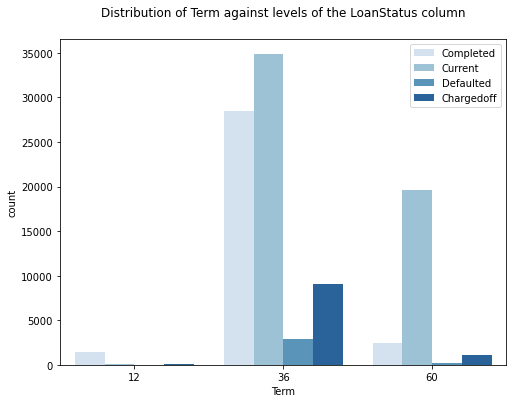

In [75]:
clusteredbar(data=sample, hue='LoanStatus', x='Term', palette='Blues')

##### Insights:
- As seen in our univariate analysis, most of the borrowers given loans are employed or work full, so it is expected to see that most of the completed and ongoing loans are in these categories. I see no major relationships between thr two columns.
- There seems to be a steady decline in default and charged off loans as the income range increases.
- There also doesn't seem to be any major interactions between loan status and the ifBorrowerHomeowner, and IncomeVerifiable columns.
- Also for the loan term column, as seen in our univariate analysis, most of the borrowers have a loan term of 36 months. So I see no major correlation with this column too. 

Now we'll check to see if there are any interesting relationships between the categorical columns

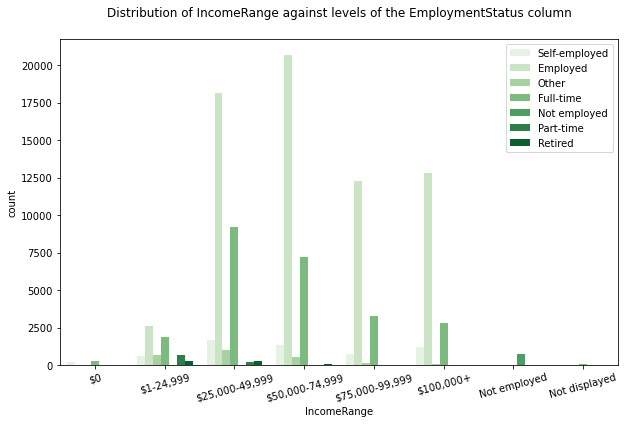

In [76]:
#viewing some categorical columns against each other - EmploymentStatus vs IncomeRange

clusteredbar(data=clean_data, hue='EmploymentStatus', x='IncomeRange', palette='Greens', figsize=(10, 6))
plt.xticks(rotation=15);

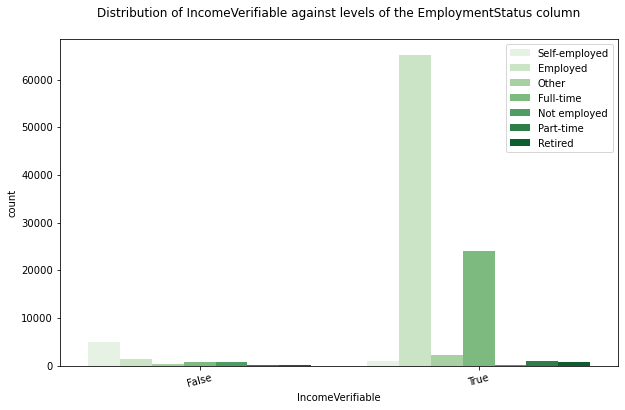

In [77]:
#EmploymentStatus vs Incomeverifiable
clusteredbar(data=clean_data, hue='EmploymentStatus', x='IncomeVerifiable', palette='Greens', figsize=(10, 6))
plt.xticks(rotation=15);

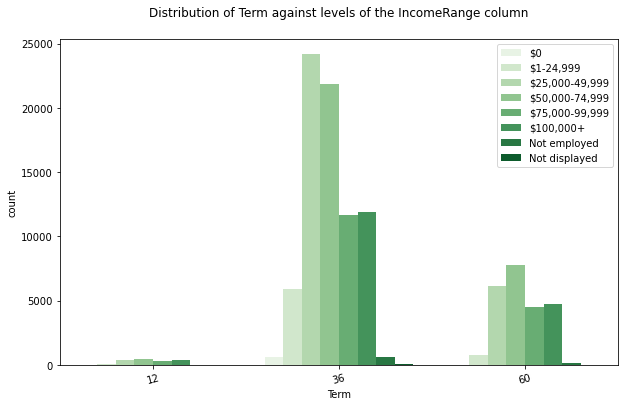

In [78]:
#EmploymentStatus vs IncomeRange
clusteredbar(data=clean_data, hue='IncomeRange', x='Term', palette='Greens', figsize=(10, 6))
plt.xticks(rotation=15);

The categorical variables don't seem to have much relationship with each other, save the income range which seems to have a slight increase as term increases. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Loan Amount had an expected correlation with CreditScoreRangeLower, I was expecting a relationship with Borrower's rate when viewing it's relationship with the numerical variables but didn't see that during exploration which was surprising. I also saw that the Loans with the lowest AvailableBankcardCredit are those that have been charged off and defaulted.

> There was also some relationship observed between Loan Amount and the categorical features. As loan term increases loan amount increases, which isn't really a surpise. Also as income range increases so does loan amount, which is also expected.

> For the Loan Status column, There seemed to be a steady decline in default and charged off loans as the income range increases, which would be explored further in the next section. Also it was observed that loans which have been completed or are currently on-going have the lowest borrower rate.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> For the numerical columns, there was an interesting negative correlation between BorrowerRate and CreditScoreRangeLower. These will be worth extra exploration in the next section.

> For the categorical columns:
> - As Income range increased, the borrower's rate reduced, which was very interesting.
> - Available bank card credit also tends to increase as income range increases

## Multivariate Exploration

In these section I would like to see how these variables: CreditScoreRangeLower, Borrower's rate, Income range, and Available bank card credit, when plotted against each other, can influence our main variables of interest - Loan Amount and Loan Status.

In [79]:
#creating a function for plotting two numerical varaibles with Loan Status
def multi_scatterplot(data, cat_var, x, y, xl, yl):
    """This function allows for plotting two numerical varaibles with our Loan Status"""
    ttype_markers = [['Chargedoff', 'o'], ['Current', 's'], ['Defaulted', 'X'], ['Completed', '*']]
    
    plt.figure(figsize=(10, 6))
    for ttype, marker in ttype_markers:
        plot_data = sample[sample['LoanStatus'] == ttype] #using our sample dataset, where Loan status has been filtered
        plt.scatter(data=plot_data, x=x , y=y, marker=marker)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.legend(['Chargedoff', 'Completed', 'Current', 'Defaulted'], title='Loan Status')
    plt.title('Plot of ' + str(yl) + ' against ' + str(xl) + ' on levels of the ' + str(cat_var) + ' variable', y=1.05);

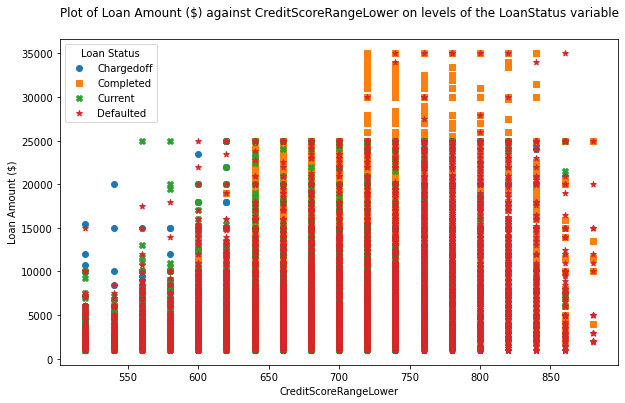

In [80]:
multi_scatterplot(sample, 'LoanStatus', x='CreditScoreRangeLower', y='LoanOriginalAmount', xl='CreditScoreRangeLower',
                  yl='Loan Amount ($)');

This plot shows a beautiful relationship that exists between the Loan Amount, CreditScoreRangeLower, and Loan status variables. There's a lot of overlapping between current and defaulted loans but the general trend is also clear. We can see that as loan amount increases, credit score increases, and in that relationship situated at the highest points of loan amount and creditscorerangelower are most of loans that are completed.

We can also see a number of chargedoff loans occur where loan amount is relatively high and creditscorerangelower is relativelt low.

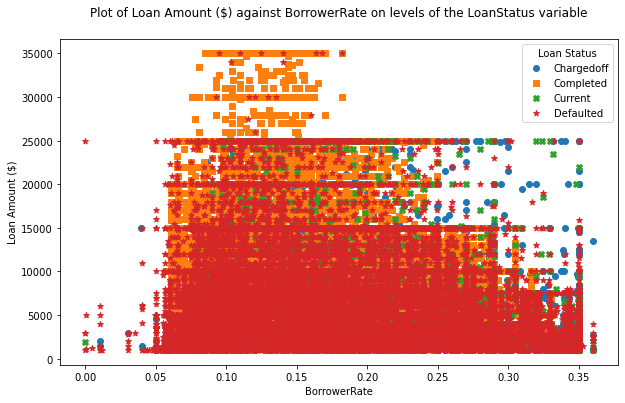

In [81]:
multi_scatterplot(sample, 'LoanStatus', x='BorrowerRate', y='LoanOriginalAmount', xl='BorrowerRate', yl='Loan Amount ($)');

I plotted the same graph to see if I can see any relationships between Loan Status, Borrower Rate, and Loan Amount; but the graph doesn't really show much.

So let's try plotting the same graph using a faceted plot.

In [84]:
#creating another function for plotting two numerical varaibles with Loan Status
def hist2dgrid(x, y, bins:list, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    plt.hist2d(x, y, bins=bins, cmap = palette, cmin = 0.5)

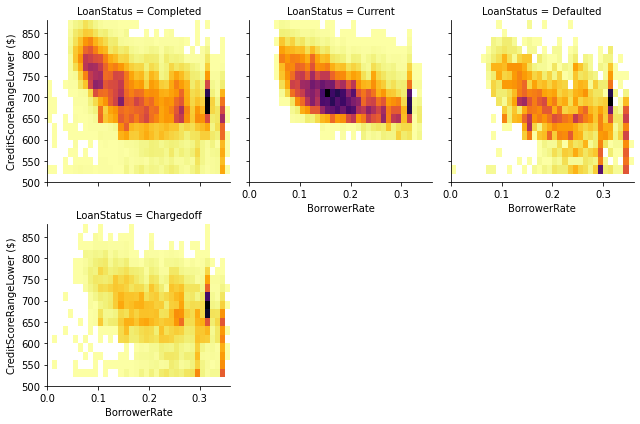

In [85]:
# create faceted heat maps on levels of the Loan status variable
bins_x = np.arange(0, sample.BorrowerRate.max()+0.01, 0.01) #borrowerrate
bins_y = np.arange(500, sample.CreditScoreRangeLower.max()+20, 20) #CreditScoreRangeLower

g = sb.FacetGrid(data = sample, col = 'LoanStatus', col_wrap = 3, height = 3);
g.map(hist2dgrid, 'BorrowerRate', 'CreditScoreRangeLower', bins=[bins_x, bins_y], color = 'inferno_r')
g.set_xlabels('BorrowerRate')
g.set_ylabels('CreditScoreRangeLower ($)');

In each of the faceted heat maps, you can see an interesting relationship between the three variables. The general trend is downward, More completed loans are located where the creditscorerangelower is high and the borrower rate is low, while more defaulted loans are located where the creditscorerangelower is relatively lower and the borrower rate is relatively higher.

For this plot I can't really see any major relationships between the 3 variables.

So now we'll look at plotting two categorical variables with one numerical variable.

In [86]:
#creating a function for plotting two categorical variables(Loan Status included) with one numerical variable
def barplot(x, y, hue):
    """Creates a barplot for plotting two categorical variables(Loan Status included) 
    with one numerical variable
    """
    plt.figure(figsize=(13,6))
    ax = sb.barplot(data=sample, x=x, y=y, hue=hue)
    ax.legend(title='LoanStatus')
    plt.xticks(rotation=15)
    plt.title('Plot of ' + str(y) + ' against ' + str(x) + ' on levels of the ' + str(hue) + ' variable', y=1.05)
    plt.xticks(rotation=15);

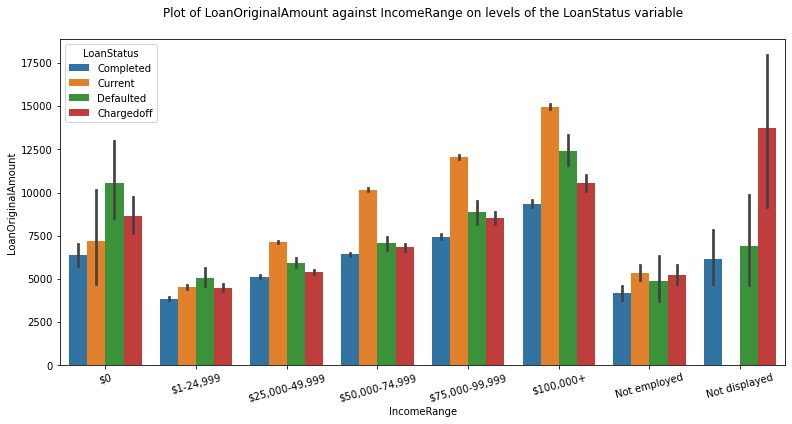

In [87]:
barplot(x='IncomeRange', y='LoanOriginalAmount', hue='LoanStatus')

This plot shows an interesting relationship. We see here that borrowers who didn't have their income range displayed had the highest chargedoff rate, and also the borrowers who have income range of 0$ have a high chance of defaulting.

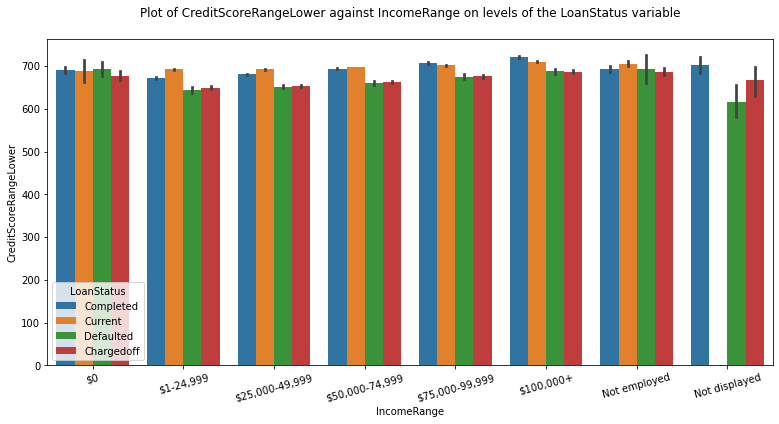

In [88]:
barplot(x='IncomeRange', y='CreditScoreRangeLower', hue='LoanStatus')

This plot doesn't show any relationship between the 3 variables

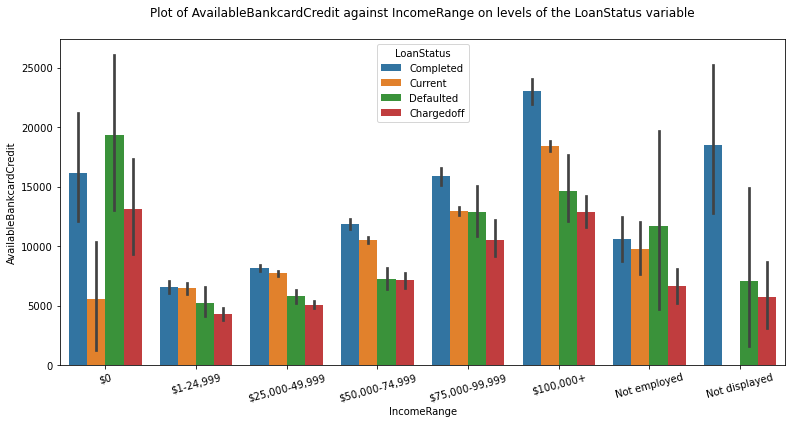

In [89]:
barplot(x='IncomeRange', y='AvailableBankcardCredit', hue='LoanStatus')

This plot shows that most borrowers having income range of 0$, have a high default rate, also there's a general increase in income range as available bank card credit increases.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of Loan Amount and Loan Status against some numeric features and one categorical feature in this section by looking at the variables against each other over different levels of the Loan Status column. The multivariate exploration here showed that CreditScoreRangeLower, Borrower's rate, Income range, and Available bank card credit are some important features that could Influence Loan Status. The influence of borrower rate on Loanstatus wasn't exactly evident until I did a multivariate plot against creditcardrangelower.


### Were there any interesting or surprising interactions between features?

> It was interesting to see how borrower rate interacted with Loan Status.

## Conclusions
> The Exploratory analytics showed some pretty interesting insights.  I was interested in finding out some features that influence loan status and features that best predict the loan amount. After the exploration I can say that CreditScoreRangeLower, Borrower's rate, Income range, and Available bank card credit are  important features that could Influence Loan Status and may also help in predicting Loan Amount.